In [156]:
import yfinance as yf
import pandas as pd
import numpy as np

In [157]:
#The Strategy
#https://www.bloomberg.com/news/articles/2022-02-08/jpmorgan-strategists-see-sure-fire-sign-it-s-time-to-buy-stocks

vix_df = yf.download('^VIX')

[*********************100%***********************]  1 of 1 completed


In [158]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

In [170]:
filt = vix_df[vix_df.Close > 1.7 * vix_df.MA]
filt

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
2008-10-10,65.849998,76.940002,65.629997,69.949997,69.949997,0,40.873181
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2010-05-07,32.759998,42.150002,31.709999,40.950001,40.950001,0,20.057273
2010-05-20,41.790001,46.369999,40.299999,45.790001,45.790001,0,26.365909
2011-08-08,36.900002,48.000000,35.290001,48.000000,48.000000,0,23.231905
2011-08-10,39.330002,44.410000,37.340000,42.990002,42.990002,0,24.887727
2015-08-21,22.549999,28.379999,20.799999,28.030001,28.030001,0,14.204545
2015-08-24,28.030001,53.290001,28.030001,40.740002,40.740002,0,15.564762


In [171]:
# Transforming into a series
series = pd.Series(filt.index).diff() / np.timedelta64(1,'D') >= 30

In [172]:
series

0     False
1      True
2      True
3     False
4     False
5      True
6     False
7      True
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16     True
17    False
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
Name: Date, dtype: bool

In [173]:
series[0] = True

In [174]:
signals = filt[series.values]
signals

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
2008-10-10,65.849998,76.940002,65.629997,69.949997,69.949997,0,40.873181
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2011-08-08,36.900002,48.000000,35.290001,48.000000,48.000000,0,23.231905
2015-08-21,22.549999,28.379999,20.799999,28.030001,28.030001,0,14.204545
2018-02-05,18.440001,38.799999,16.799999,37.320000,37.320000,0,13.152500
2018-10-10,16.030001,22.959999,15.830000,22.959999,22.959999,0,13.356364
2019-08-05,19.959999,24.809999,19.910000,24.590000,24.590000,0,14.283810
2020-02-27,32.139999,39.310001,29.370001,39.160000,39.160000,0,18.264762


In [175]:
sp_df = yf.download('^GSPC', start='1990-01-01')

[*********************100%***********************]  1 of 1 completed


In [176]:
from pandas.tseries.offsets import DateOffset

In [177]:
returns = []

for i in range(len(signals)):
    subdf = sp_df[(sp_df.index >= signals.index[i]) & 
             (sp_df.index <= signals.index[i] + DateOffset(months=6))]
    returns.append((subdf.Close.pct_change() +1).prod())

In [178]:
pd.Series(returns).mean()

1.0822109113494647

In [179]:
pd.Series(returns)-1

0    0.070687
1   -0.047441
2    0.086602
3    0.205903
4   -0.026947
5    0.072259
6    0.036806
7    0.172230
8    0.169799
dtype: float64

<AxesSubplot:>

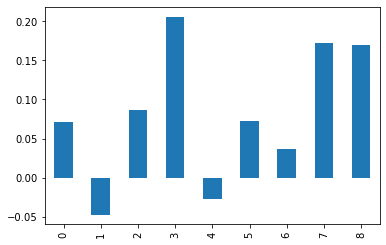

In [180]:
(pd.Series(returns)-1).plot(kind='bar')